In [1]:
import networkx as nx
import entropart as ep
from matplotlib import pyplot as plt
%matplotlib inline
%autoreload 2

# How to compute an entrogram

Tips:
- Use a `nx.Graph()` or a `nx.DiGraph()`.
- The edge weights should be saved in the edge data `weight`.
- Do not use high values for depth (the number of bars in the entrogram) otherwise the computation time will explode (yes, you need to compute the probability of each path of lenght `depth + 1`)


In [3]:
ndepth=4
karate = nx.karate_club_graph()
part = {n[0]: int(n[1] == "Mr. Hi") for n in karate.nodes.data("club")}
H_ks, entrogram = ep.entrogram(
    karate,
    part,
    depth=ndepth
)
print(entrogram)

[0.03121669 0.00152005 0.00047187 0.00011017]


## Entropy rate

In [4]:
print(H_ks)
print(len(entrogram))

0.555526545664867
4


## Entrogram

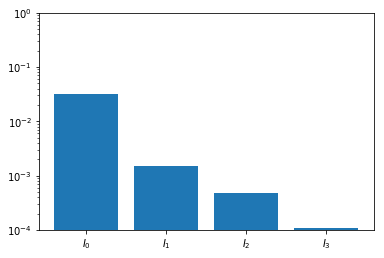

In [5]:
plt.bar(range(ndepth), entrogram)
plt.xticks(range(ndepth), [r'$I_{}$'.format(i) for i in range(ndepth)])
plt.semilogy()
plt.ylim(1e-4, 1)
plt.show()

In [9]:
ep.log.setLevel('INFO')
bps = ep.best_partition(karate, kmax=10, alpha=0.0, compute_steady=True, probNorm=1, tsteps=10000, beta=1000)

2018-09-14 16:56:42,001 || Optimization with 10 parts, alpha 0.0, beta 1000, probNorm 1
100%|██████████| 10000/10000 [00:04<00:00, 2339.53it/s]
2018-09-14 16:56:46,279 || good 72, not so good 28, best 54
2018-09-14 16:56:46,284 || 10 -- 0727556788667799579297914418882133 
2018-09-14 16:56:46,284 ||    -- 1.4055681026245068
100%|██████████| 10000/10000 [00:03<00:00, 2733.88it/s]
2018-09-14 16:56:49,961 || good 10, not so good 10, best 0
2018-09-14 16:56:49,966 || 9 -- 0626555677556688568286814417772133 
2018-09-14 16:56:49,966 ||    -- 1.3645084130589762
100%|██████████| 10000/10000 [00:03<00:00, 2508.92it/s]
2018-09-14 16:56:53,968 || good 14, not so good 13, best 1
2018-09-14 16:56:53,974 || 8 -- 0525444566445577457275711116612133 
2018-09-14 16:56:53,974 ||    -- 1.2855215216786169
100%|██████████| 10000/10000 [00:03<00:00, 2538.64it/s]
2018-09-14 16:56:57,927 || good 20, not so good 19, best 2
2018-09-14 16:56:57,933 || 7 -- 0525444566445566456265613116612133 
2018-09-14 16:56:57,93

In [10]:
print(bps)

{10: {0: 0, 1: 7, 2: 2, 3: 7, 4: 5, 5: 5, 6: 6, 7: 7, 8: 8, 9: 8, 10: 6, 11: 6, 12: 7, 13: 7, 14: 9, 15: 9, 16: 5, 17: 7, 18: 9, 19: 2, 20: 9, 21: 7, 22: 9, 23: 1, 24: 4, 25: 4, 26: 1, 27: 8, 28: 8, 29: 8, 30: 2, 31: 1, 32: 3, 33: 3}, 9: {0: 0, 1: 6, 2: 2, 3: 6, 4: 5, 5: 5, 6: 5, 7: 6, 8: 7, 9: 7, 10: 5, 11: 5, 12: 6, 13: 6, 14: 8, 15: 8, 16: 5, 17: 6, 18: 8, 19: 2, 20: 8, 21: 6, 22: 8, 23: 1, 24: 4, 25: 4, 26: 1, 27: 7, 28: 7, 29: 7, 30: 2, 31: 1, 32: 3, 33: 3}, 8: {0: 0, 1: 5, 2: 2, 3: 5, 4: 4, 5: 4, 6: 4, 7: 5, 8: 6, 9: 6, 10: 4, 11: 4, 12: 5, 13: 5, 14: 7, 15: 7, 16: 4, 17: 5, 18: 7, 19: 2, 20: 7, 21: 5, 22: 7, 23: 1, 24: 1, 25: 1, 26: 1, 27: 6, 28: 6, 29: 1, 30: 2, 31: 1, 32: 3, 33: 3}, 7: {0: 0, 1: 5, 2: 2, 3: 5, 4: 4, 5: 4, 6: 4, 7: 5, 8: 6, 9: 6, 10: 4, 11: 4, 12: 5, 13: 5, 14: 6, 15: 6, 16: 4, 17: 5, 18: 6, 19: 2, 20: 6, 21: 5, 22: 6, 23: 1, 24: 3, 25: 1, 26: 1, 27: 6, 28: 6, 29: 1, 30: 2, 31: 1, 32: 3, 33: 3}, 6: {0: 0, 1: 5, 2: 2, 3: 5, 4: 4, 5: 4, 6: 4, 7: 5, 8: 1, 9: 1, 10

In [11]:
ep.utils.value(ep.PGraph(karate, init_part=bps[2]), alpha=0.0)

0.4475048856748889